In [1]:
#text clustering
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv('/content/drive/My Drive/all_news_Set2.csv')
df.head()

,_id,topic,content
0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide..."
1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons..."
2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB..."
3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack..."
4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s..."


In [38]:
df1.shape

(2197, 4)

In [25]:
df.topic.nunique()

67

In [21]:
df.topic.isnull().sum()

895

In [37]:
df = df[df['content'].notna()]
df1 = df[df['topic'].notna()]

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import re

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# data preprocessing
stemmer = SnowballStemmer(language='english',ignore_stopwords=True)
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [9]:
# preview after preprocessing
doc_sample = df.content[1]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['["The', 'government', 'is', 'weighing', 'the', 'pros', 'and', 'cons', 'of', 'halting', 'imports,', 'including', 'that', 'from', 'China,', 'on', 'India’s', 'manufacturing', 'sector', 'and', 'the', 'commerce', 'ministry', 'will', 'soon', 'submit', 'to', 'the', 'prime', 'minister’s', 'office', 'a', 'list', 'of', 'items', 'of', 'inward', 'shipments', 'that', 'can', 'be', 'restricted', 'in', 'the', 'near', 'future', 'without', 'impacting', 'domestic', 'manufacturing.","The', 'government', 'has', 'held', 'various', 'meetings', 'in', 'the', 'past', 'two', 'weeks', 'with', 'sectoral', 'experts', 'and', 'businesses', 'and', 'is', 'now', 'preparing', 'an', 'official', 'list', 'of', 'commodities', 'that', 'can', 'be', 'locally', 'manufactured,', 'an', 'official', 'said,', 'adding', 'that', 'ample', 'caution', 'will', 'be', 'maintained', 'before', 'taking', 'any', 'decision', 'even', 'as', 'voices', 'against', 'Chinese', 'goods', 'have', 'been', 'gaining', 'momentum.","The', 

In [39]:
# Preprocess the headline text, saving the results as ‘processed_docs’
df1['processed_topic'] = df1['topic'].map(preprocess)
#df['processed_content'] = df['content'].map(preprocess)
#processed_docs.head(5)
#df.head()
df1['processed_topic'] = df1['processed_topic'].apply(lambda x: ' '.join(x))
#df['processed_content'] = df['processed_content'].apply(lambda x: ' '.join(x))
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,_id,topic,content,processed_content,processed_topic
0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",west bengal govern tuesday decid impos complet...,nation
1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",govern weigh pros con halt import includ china...,busi
2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",central board secondari educ cbse slash syllab...,nation
3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",world health organ tuesday acknowledg emerg ev...,intern
4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",presid donald trump tuesday formal start withd...,intern


In [40]:
df1.to_csv('/content/drive/My Drive/edited_topics_all_news_set2.csv')

In [41]:
#feature extraction
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.processed_content.values)
features = vec.transform(df1.processed_content.values)

In [42]:
#model training
random_state = 0
cls = MiniBatchKMeans(n_clusters=30, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=30, n_init=3, random_state=0,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [43]:
#predict on new data
cls.predict(features)

array([ 9,  1, 11, ...,  9, 29,  9], dtype=int32)

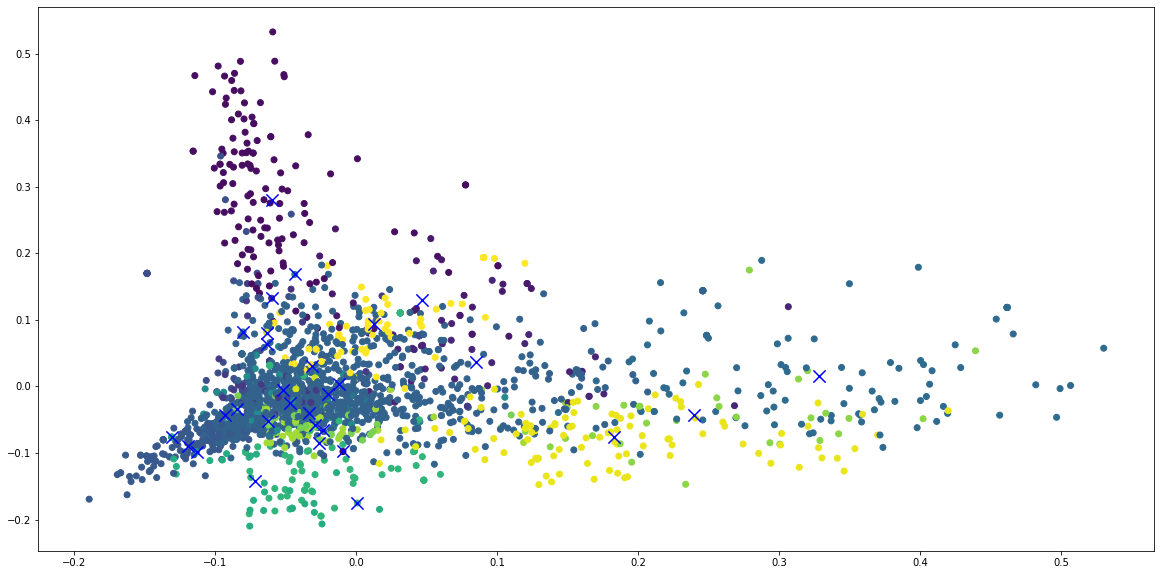

In [44]:
#visualization
# reduce the features to 2D
plt.figure(figsize=(20,10))
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [45]:
#evaluation with unlabelled dataset
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.0065752537569716725

In [46]:
from sklearn.metrics import normalized_mutual_info_score

In [49]:
nmi = normalized_mutual_info_score(df1.processed_topic, cls.labels_)
nmi

0.2642616252770162

In [52]:
#more on accuracy scores

#actual labels
actual_labels = np.unique(df1.processed_topic, return_inverse=True)[1]
#pd.factorize(df.processed_topic)[0]

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(cls.labels_, actual_labels)

0.01456531634046427

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(30.5, 0.5, 'predicted label')

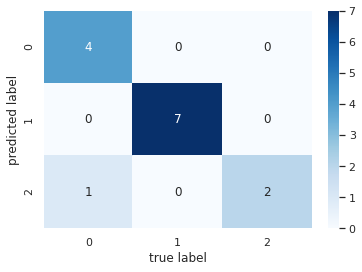

In [ ]:
import seaborn as sns
sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(cls.labels_, actual_labels)
sns.heatmap(mat.T, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.metrics import classification_report
classification_report(actual_labels, cls.labels_) 

'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89         4\n           1       1.00      1.00      1.00         7\n           2       1.00      0.67      0.80         3\n\n    accuracy                           0.93        14\n   macro avg       0.93      0.89      0.90        14\nweighted avg       0.94      0.93      0.93        14\n'

In [54]:
from sklearn.metrics import precision_score
precision_score(actual_labels, cls.labels_,  average='micro')

0.01456531634046427

In [55]:
from sklearn.metrics import recall_score
recall_score(actual_labels, cls.labels_, average='micro')

0.01456531634046427

In [56]:
cls.labels_

array([ 9,  1, 11, ...,  9, 29,  9], dtype=int32)

In [57]:
actual_labels

array([32,  5, 32, ...,  6,  5,  5])

In [58]:
#topic modelling
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

random_state = 0

def only_nouns(texts):
    output = []
    for doc in nlp.pipe(texts):
        noun_text = " ".join(token.lemma_ for token in doc if token.pos_ == 'NOUN')
        output.append(noun_text)
    return output


df['noun_content'] = only_nouns(df['content'])

df.head()

,_id,topic,content,processed_content,noun_content
0,5f04e496ef217aae6a201f71,"[""National""]","[""The West Bengal government on Tuesday decide...",west bengal govern tuesday decid impos complet...,government lockdown containment zone case casu...
1,5f04e498ef217aae6a201f72,"[""Business""]","[""The government is weighing the pros and cons...",govern weigh pros con halt import includ china...,government pro con import manufacturing sector...
2,5f04e49aef217aae6a201f73,"[""National""]","[""The Central Board of Secondary Education (CB...",central board secondari educ cbse slash syllab...,syllabus class third year country pandemic imp...
3,5f04e49def217aae6a201f74,"[""International""]","[""The World Health Organization on Tuesday ack...",world health organ tuesday acknowledg emerg ev...,"\""emerging evidence\ spread group scientist bo..."
4,5f04e49fef217aae6a201f75,"[""International""]","[""President Donald Trump on Tuesday formally s...",presid donald trump tuesday formal start withd...,withdrawal threat body funding source response...


In [59]:
# change this to see different results using the components_ attribute
n_topics = 30

#for extracting features
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(df.noun_content)

#for topic modelling

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=30, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [60]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 case death number state day tally toll infection rate fatality country sample recovery district bulletin 
1 actor suicide post fan demise family picture star actress death statement father role tv television 
2 country policy trade economy world border power development nation government medium project law statement region 
3 student class university semester college course exam school education teacher examination institution syllabus programme teaching 
4 police encounter policeman station murder gangster investigation officer house killing personnel force case official cop 
5 hospital doctor treatment ambulance bed staff family condition health nurse baby facility admission patient report 
6 app user feature privacy application datum security device platform researcher email service technology ban phone 
7 vaccine trial phase dose drug candidate study antibody approval site company volunteer efficacy researcher country 
8 cent crore quarter sector lakh rate bank gdp share recovery

In [61]:
# to identify topic of a new document
new_articles = [
    '''I have arranged for a loudspeaker system on a cart. The teachers are asked to turn-wise go with the cart and park it at a feasible location and impart lessons from there. It cannot match up to classroom learning but will ensure some learning,” he said. This strange new way of educating school students is not uncommon in the country’s rural parts. The lockdown induced by COVID-19 in March prompted schools and colleges to move to the virtual world for teaching and learning activities. But weak internet penetration has turned e-education into a distant dream for many children in the rural areas. ''',
    '''World Cup squad. The side led by Sourav Ganguly in 2003 had experienced top-order batsmen such as Virender Sehwag, Sachin Tendulkar, Rahul Dravid, and Ganguly. Virat Kohli’s team in 2019 also had a strong top-order with Shikhar Dhawan, Rohit Sharma and Kohli himself. Ganguly’s pace bowling department looked strong with four top-class seamers in Zaheer Khan, Ashish Nehra, Ajit Agarkar and veteran Javagal Srinath. Kohli had Jasprit Bumrah, Bhuvneshwar Kumar and Mohammed Shami - all at top of their game. Ganguly’s spin department was sorted with veterans Harbhajan Singh and Anil Kumble, while Kohli’s spin bowling options were Yuzvendra Chahal, Kuldeep Yadav and Ravindra Jadeja '''
]
# first transform the text into features using vec
# then pass it to transform of cls
# the result will be a matrix of shape [2, 10]
# then we sort the topic id based on the score using argsort
# and take the last one (with the highest score) for each row using `[:,-1]` indexing
cls.transform(vec.transform(new_articles)).argsort(axis=1)[:,-1]

array([14,  9])